In [2]:
!pip install zipfile36

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import zipfile36 as zipfile

In [4]:
from google.colab import files
uploaded = files.upload()

Saving digit-recognizer.zip to digit-recognizer.zip


In [7]:
zip_ref = zipfile.ZipFile('/content/digit-recognizer.zip', 'r')
zip_ref.extractall('/content/mnist')
zip_ref.close()

In [8]:
# Charger les données d'entraînement et de test depuis les fichiers CSV
train_data = pd.read_csv('/content/mnist/train.csv')
test_data = pd.read_csv('/content/mnist/test.csv')

In [9]:
print("Données d'entraînement:")
print(train_data.head())

Données d'entraînement:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0     

In [10]:
print("\nDonnées de test:")
print(test_data.head())


Données de test:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0     

In [11]:
# Séparer les labels (y) des features (X) pour l'entraînement
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

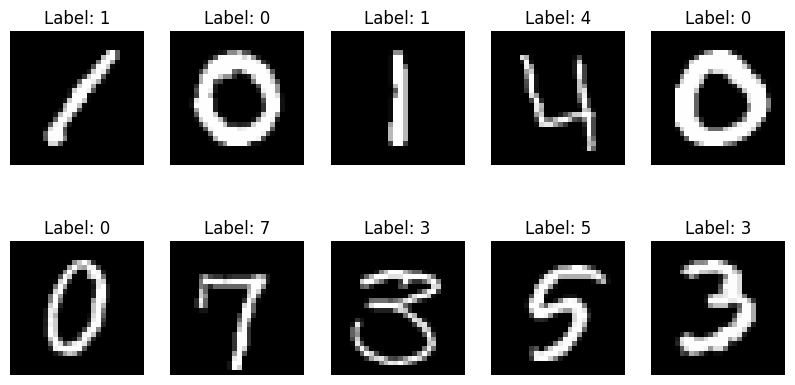

In [12]:
# Visualiser quelques images d'entraînement
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')

plt.show()

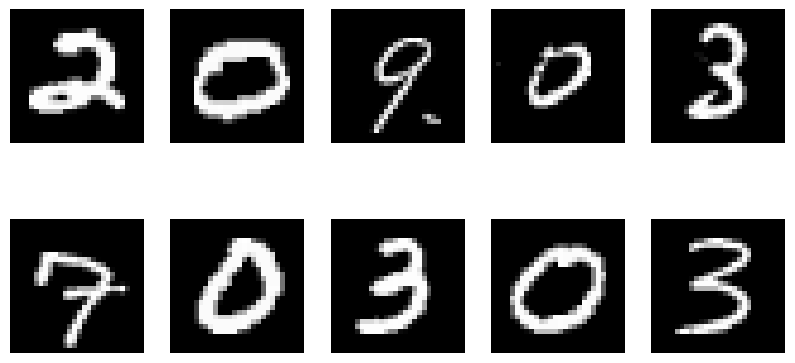

In [13]:
# Séparer les labels (y) des features (X) pour le test
X_test = test_data

# Visualiser quelques images de test
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_test.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

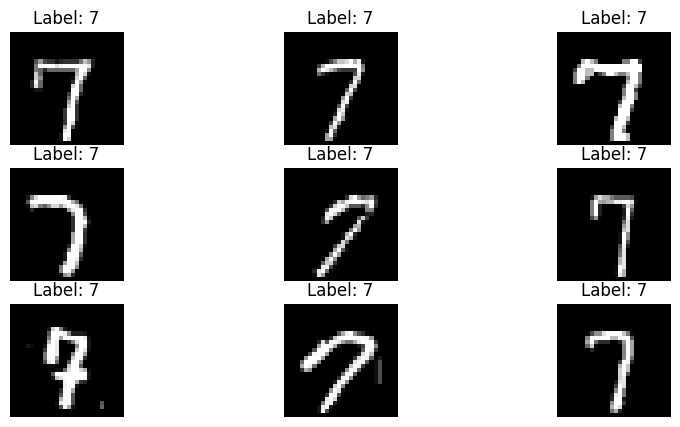

In [14]:
# Sélectionner les indices des images correspondant au chiffre 7
indices_sevens = y_train[y_train == 7].index[:9]

# Afficher les 9 premières images correspondant au chiffre 7 dans une seule figure
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices_sevens):
    plt.subplot(3, 3, i + 1)
    img = X_train.iloc[index].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train.iloc[index]}")
    plt.axis('off')

plt.show()

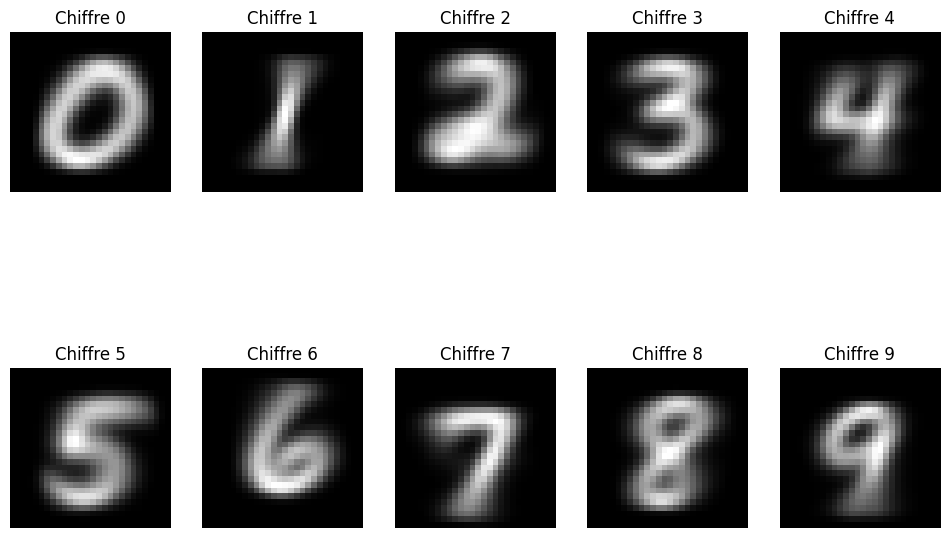

In [15]:
# Calculer les représentants moyens pour chaque chiffre de 0 à 9
mean_digits = []
for digit in range(10):
    # Sélectionner les indices des images correspondant au chiffre
    indices_digit = y_train[y_train == digit].index

    # Calculer la moyenne des images correspondant au chiffre
    mean_img = X_train.iloc[indices_digit].mean().values.reshape(28, 28)
    mean_digits.append(mean_img)

# Afficher les représentants moyens dans une figure
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_digits[i], cmap='gray')
    plt.title(f"Chiffre {i}")
    plt.axis('off')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#REGRESSION LOGISTIQUE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
logistic_regression_model = LogisticRegression()

# Entraîner le modèle
logistic_regression_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_logistic = logistic_regression_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# Afficher les résultats
print("Logistic Regression Accuracy: {:.4f}".format(accuracy_logistic))
print("\nLogistic Regression Classification Report:\n{}".format(report_logistic))


Logistic Regression Accuracy: 0.9092

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.95      0.97      0.96       909
           2       0.89      0.87      0.88       846
           3       0.90      0.87      0.89       937
           4       0.90      0.91      0.91       839
           5       0.85      0.86      0.86       702
           6       0.91      0.95      0.93       785
           7       0.93      0.92      0.92       893
           8       0.89      0.88      0.89       835
           9       0.89      0.91      0.90       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#ARBRE DE DECISION
from sklearn.tree import DecisionTreeClassifier

# Initialiser le modèle
decision_tree_model = DecisionTreeClassifier()

# Entraîner le modèle
decision_tree_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Afficher les résultats
print("Decision Tree Accuracy: {:.4f}".format(accuracy_decision_tree))
print("\nDecision Tree Classification Report:\n{}".format(report_decision_tree))

Decision Tree Accuracy: 0.8527

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       816
           1       0.92      0.94      0.93       909
           2       0.83      0.80      0.81       846
           3       0.83      0.81      0.82       937
           4       0.85      0.86      0.86       839
           5       0.77      0.78      0.78       702
           6       0.90      0.89      0.90       785
           7       0.89      0.88      0.89       893
           8       0.78      0.79      0.79       835
           9       0.82      0.84      0.83       838

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [20]:
#Forêt aléatoire
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
random_forest_model = RandomForestClassifier()

# Entraîner le modèle
random_forest_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)

# Afficher les résultats
print("Random Forest Accuracy: {:.4f}".format(accuracy_random_forest))
print("\nRandom Forest Classification Report:\n{}".format(report_random_forest))

Random Forest Accuracy: 0.9613

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.98       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.96       839
           5       0.96      0.95      0.95       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



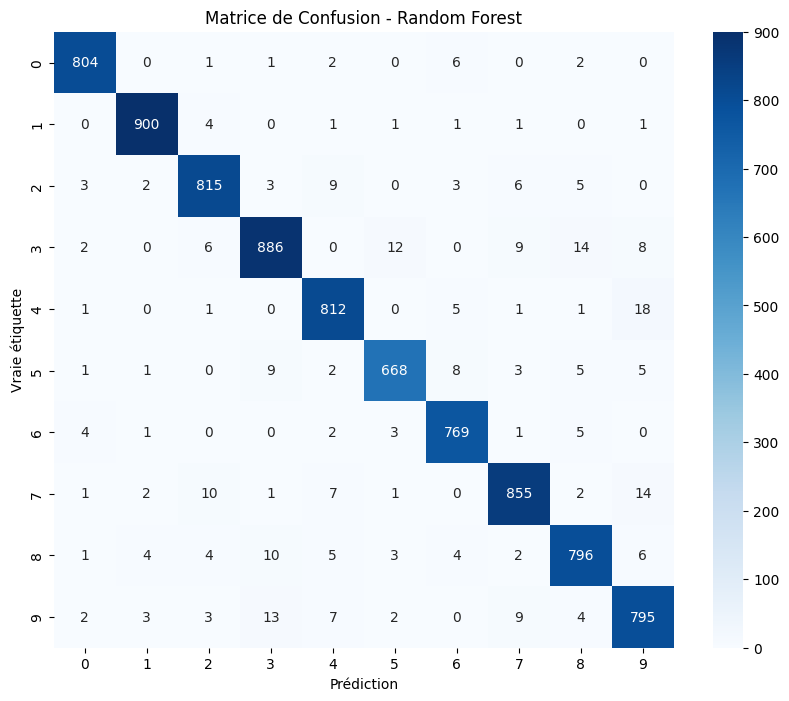

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les étiquettes sur l'ensemble de test
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

In [ ]:
#Machine à Vecteurs de Support (SVM)
from sklearn.svm import SVC

# Initialiser le modèle
svm_model = SVC()

# Entraîner le modèle
svm_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Afficher les résultats
print("SVM Accuracy: {:.4f}".format(accuracy_svm))
print("\nSVM Classification Report:\n{}".format(report_svm))

SVM Accuracy: 0.9585

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.98      0.98       909
           2       0.91      0.97      0.94       846
           3       0.95      0.94      0.95       937
           4       0.97      0.96      0.97       839
           5       0.95      0.94      0.95       702
           6       0.96      0.97      0.96       785
           7       0.96      0.96      0.96       893
           8       0.96      0.94      0.95       835
           9       0.96      0.93      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

